# Exploring Dandiset 000617: Allen Institute Openscope - Sequence Learning Project

This notebook explores Dandiset 000617 version 0.250312.0130, which contains two-photon calcium imaging and behavioral data from mice during a sequence learning task.

**Note:** This notebook was AI-generated and has not been fully verified. Please exercise caution when interpreting the code or results.

## Dandiset Overview

Dandiset 000617, titled "Allen Institute Openscope - Sequence Learning Project", investigates neural computations related to predictive coding in the neocortex during a sequence learning experiment. Head-fixed mice viewed sequences of natural movie clips (A, B, C) to study how the brain predicts upcoming stimuli.

For more information, you can visit the Dandiset page on the DANDI archive:
https://dandiarchive.org/dandiset/000617/0.250312.0130

## Notebook Contents

This notebook will cover:

1. Loading the Dandiset using the DANDI API.
2. Accessing and exploring an NWB file from the Dandiset.
3. Visualizing calcium imaging data (dF/F traces).
4. Visualizing running speed data.
5. Visualizing ROI masks.
6. Summarizing findings and future directions.

## Required Packages

This notebook requires the following packages:

* dandi
* pynwb
* h5py
* remfile
* numpy
* matplotlib
* pandas
* seaborn

## Loading the Dandiset

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000617", "0.250312.0130")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Sequence Learning Project
Dandiset URL: https://dandiarchive.org/dandiset/000617/0.250312.0130

First 5 assets:
- sub-684475/sub-684475_ses-1294084428-acq-1294179945-raw-movies_ophys.nwb (ID: 3eaf1acf-7a63-4286-a7c0-7a58d8cae2f8)
- sub-684475/sub-684475_ses-1294084428-acq-1294179943-raw-movies_ophys.nwb (ID: 4cfa15bb-eac7-4273-9141-6d0cc2034506)
- sub-684475/sub-684475_ses-1293785946-acq-1293914859-raw-movies_ophys.nwb (ID: d0b9a557-2c98-4fbc-af96-2318e6e5f2eb)
- sub-684475/sub-684475_ses-1294084428-acq-1294179942-raw-movies_ophys.nwb (ID: 6b8f9ba6-2481-4c7b-b78c-38c2b878d246)
- sub-684475/sub-684475_ses-1294259213-acq-1294370666-raw-movies_ophys.nwb (ID: c407d5e4-9431-4f94-b5d0-2b28069fa244)


## Accessing an NWB file

We will now load one of the NWB files from the Dandiset. We will use the file located at `sub-677038/sub-677038_ses-1280089433-acq-1280384858_ophys.nwb`.

The URL for this asset is:
`https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/`

In [2]:
import pynwb
import h5py
import remfile

# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

## NWB File Contents Summary

This NWB file contains various types of electrophysiology and behavioral data. Here is a summary of the key data streams available:

*   **acquisition**: Contains time-series data related to the running wheel (`v_in`, `v_sig`).
*   **stimulus_template**: Provides templates for the visual stimuli (`gray`, `movie_clip_A`, `movie_clip_B`, `movie_clip_C`).
*   **processing**: Contains processed data, including:
   *   `ophys`: Processed optical physiology data (`corrected_fluorescence`, `dff`, `event_detection`).
   *   `running`: Processed running behavior data (`dx`, `speed`, `speed_unfiltered`).
   *   `stimulus`: Processed stimulus timing information (`timestamps`).
   *   `stimulus_ophys`: Processed stimulus timing information aligned to ophys (`timestamps`).

The `ophys` module includes `dff` (delta F/F) traces for segmented regions of interest (ROIs), event detection results, and image segmentation information including ROI masks.

The `running` module includes processed running speed data.

The `intervals` section contains detailed presentation times and stimuli details for each movie clip (`gray_presentations`, `movie_clip_A_presentations`, etc.).

**Note:** The raw movie data are in separate .nwb files as shown in the asset list.

You can explore this specific NWB file on Neurosift:
https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/&dandisetId=000617&dandisetVersion=draft

## Visualizing Data

### dF/F Traces

Let's visualize the dF/F traces for a few example ROIs.

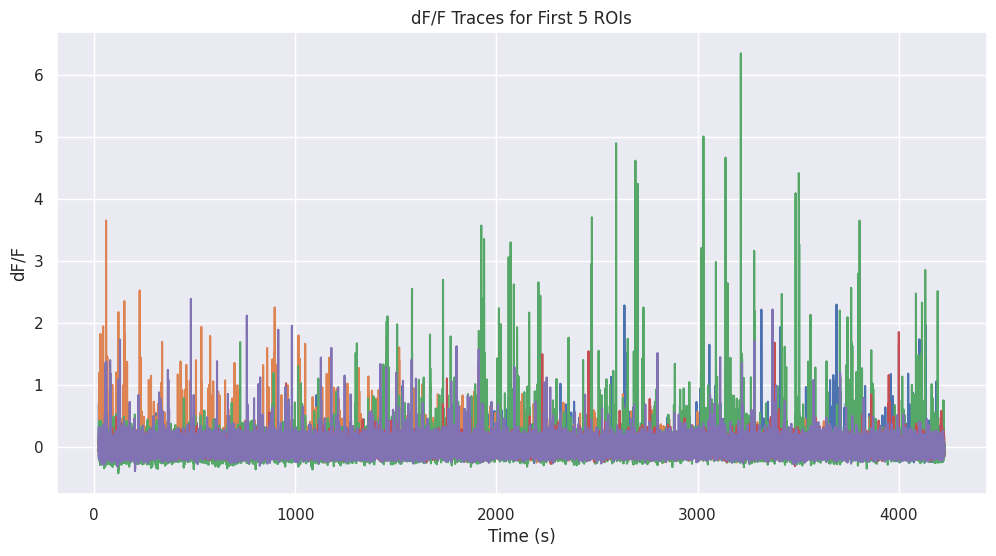

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

# Get dF/F traces and timestamps
dff_traces = nwb.processing['ophys'].data_interfaces['dff'].roi_response_series['traces'].data
timestamps = nwb.processing['ophys'].data_interfaces['dff'].roi_response_series['traces'].timestamps

# Select a few example ROIs (e.g., first 5)
num_rois_to_plot = 5
roi_indices_to_plot = range(num_rois_to_plot)

# Plot the dF/F traces
plt.figure(figsize=(12, 6))
for i in roi_indices_to_plot:
    plt.plot(timestamps[:], dff_traces[:, i], label=f'ROI {i}')

plt.xlabel('Time (s)')
plt.ylabel('dF/F')
plt.title(f'dF/F Traces for First {num_rois_to_plot} ROIs')
plt.show()

### Running Speed

Now let's visualize the running speed of the mouse over time.

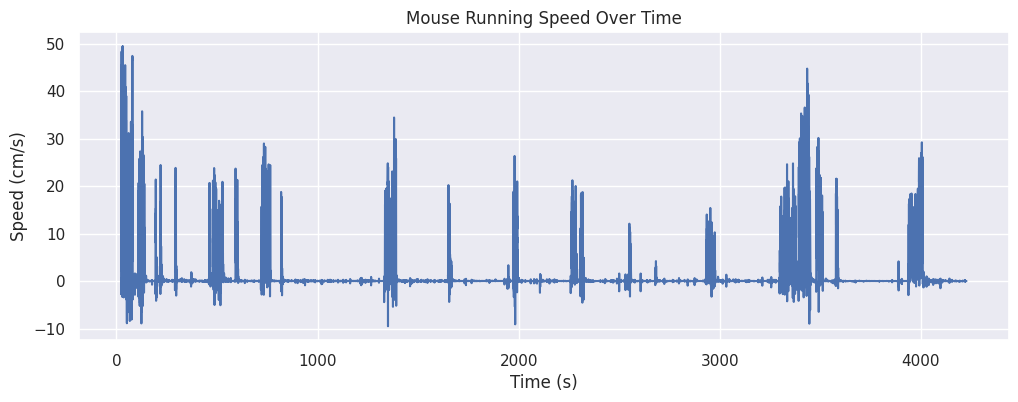

In [4]:
# Get running speed data and timestamps
running_speed_data = nwb.processing['running'].data_interfaces['speed'].data
running_speed_timestamps = nwb.processing['running'].data_interfaces['speed'].timestamps

# Plot the running speed
plt.figure(figsize=(12, 4))
plt.plot(running_speed_timestamps[:], running_speed_data[:])
plt.xlabel('Time (s)')
plt.ylabel('Speed (cm/s)')
plt.title('Mouse Running Speed Over Time')
plt.show()

### ROI Masks

We can also visualize the spatial masks of the segmented ROIs. Each ROI has an image mask representing its location.

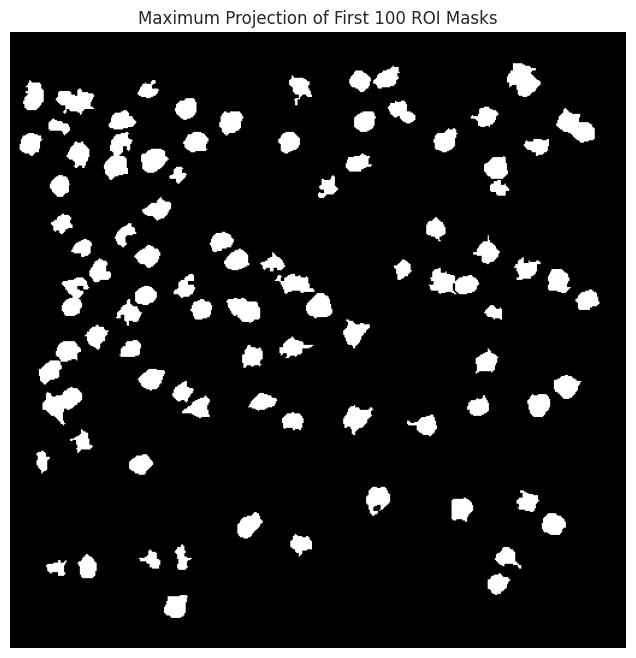

In [5]:
# Get the cell specimen table which contains ROI information
cell_specimen_table = nwb.processing['ophys'].data_interfaces['image_segmentation'].plane_segmentations['cell_specimen_table']

# Get the image masks
image_masks = cell_specimen_table['image_mask']

# Stack the masks and take the maximum projection to see all ROI locations
# We'll take a subset of masks to avoid excessive memory usage if there are many ROIs
num_masks_to_show = min(100, len(image_masks))
stacked_masks = np.array([mask for mask in islice(image_masks, num_masks_to_show)])
max_projection_mask = np.max(stacked_masks, axis=0)

# Plot the maximum projection of the masks
plt.figure(figsize=(8, 8))
plt.imshow(max_projection_mask, cmap='gray')
plt.title(f'Maximum Projection of First {num_masks_to_show} ROI Masks')
plt.axis('off')
plt.show()

### dF/F vs Running Speed

Let's see if there's any apparent relationship between calcium activity (dF/F) and running speed. We'll need to resample one of the time series to match the sampling rate of the other. The ophys data has a lower sampling rate, so we will resample the running data to match ophys timestamps.

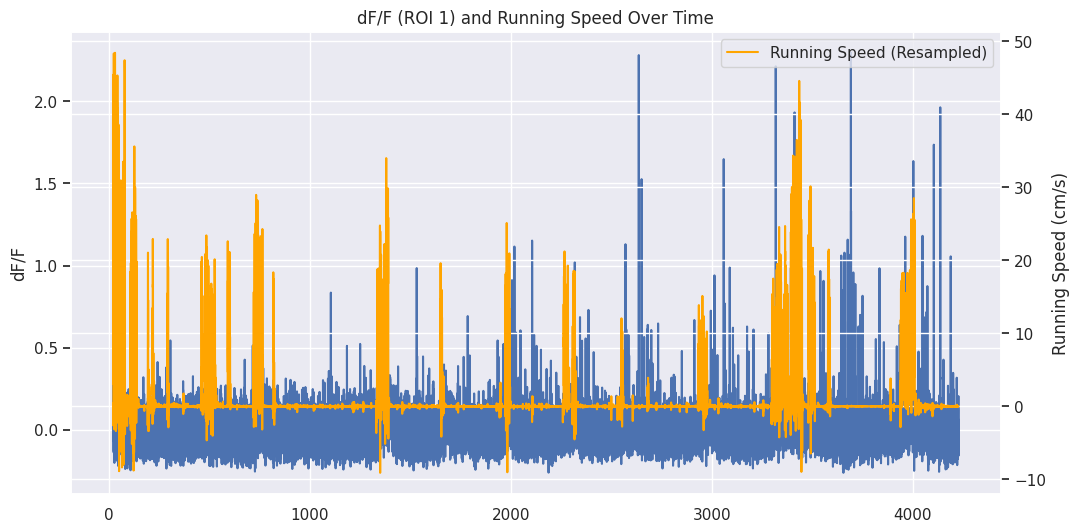

In [6]:
from scipy.interpolate import interp1d

# Get dF/F timestamps and data (using the first ROI for simplicity)
ophys_timestamps = nwb.processing['ophys'].data_interfaces['dff'].roi_response_series['traces'].timestamps[:]
dff_roi1 = nwb.processing['ophys'].data_interfaces['dff'].roi_response_series['traces'].data[:, 0]

# Get running speed timestamps and data
running_timestamps = nwb.processing['running'].data_interfaces['speed'].timestamps[:]
running_speed = nwb.processing['running'].data_interfaces['speed'].data[:]

# Interpolate running speed to match ophys timestamps
interp_running_speed = interp1d(running_timestamps, running_speed, kind='linear', bounds_error=False, fill_value="extrapolate")
running_speed_resampled = interp_running_speed(ophys_timestamps)

# Plot dF/F for ROI 1 and resampled running speed
plt.figure(figsize=(12, 6))

plt.plot(ophys_timestamps, dff_roi1, label='dF/F (ROI 1)')
plt.ylabel('dF/F')
plt.twinx() # Create a second y-axis
plt.plot(ophys_timestamps, running_speed_resampled, color='orange', label='Running Speed (Resampled)')
plt.ylabel('Running Speed (cm/s)')
plt.xlabel('Time (s)')
plt.title('dF/F (ROI 1) and Running Speed Over Time')
plt.legend(loc='upper right')
plt.show()

## Summary and Future Directions

This notebook demonstrated how to access and visualize some of the key data streams in Dandiset 000617 using pynwb and other Python libraries. We explored dF/F traces, running speed, and ROI masks, and showed a simple comparison between neural activity and behavior.

Possible future directions for analysis include:

*   Analyzing neural responses to specific movie clips using the stimulus presentation times.
*   Investigating correlations between the activity of different neurons.
*   Examining how neural activity and behavior change across different recording sessions as the mice learn the stimulus sequence.
*   Comparing neural activity in different cortical areas (VISp, VISl, VISam, VISpm) and layers (L2/3, L4).
*   Utilizing event detection results for analyzing discrete neural events.

This Dandiset provides a rich dataset for studying the neural basis of sequence learning and predictive processing in the visual cortex.

In [7]:
# Close the NWB file
# io.close()